<a href="https://colab.research.google.com/github/Sarthak702-droid/vehicle-co2-emission-analysis/blob/main/Copy_of_Car_co2_emmision_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('co2.csv')
print(df.info() , "\n", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
print(f'null value :- {df.isna().sum().sum()}\nduplicate valued :- {df.duplicated().sum()}')

null value :- 0
duplicate valued :- 1103


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
cols = ["Make" , "Model" , "Vehicle Class" , "Transmission", "Fuel Type"]
for i in cols:
    print(f'{i}  :- {df[i].unique()}\t\tNumber of Unique Values is :- {df[i].nunique()}')

Make  :- ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']		Number of Unique Values is :- 42
Model  :- ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']		Number of Unique Values is :- 2053
Vehicle Class  :- ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']		Number of Unique Values is :- 16
Transmission  :- ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'A

**Types of Fuel :-**


    Z: Premium gasoline
    D: Diesel
    X: Regular gasoline
    E: Ethanol (E85)
    N: Natural gas


In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
top_models = df['Model'].value_counts().head(10).index
top_models

Index(['F-150 FFV', 'F-150 FFV 4X4', 'MUSTANG', 'FOCUS FFV', 'F-150 4X4',
       'F-150', 'SONIC 5', 'ATS', 'COMPASS', 'JETTA'],
      dtype='object', name='Model')

In [ ]:
top_cars = df['Make'].value_counts().head(10).index
top_cars

Index(['FORD', 'CHEVROLET', 'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'GMC', 'TOYOTA',
       'AUDI', 'NISSAN', 'JEEP'],
      dtype='object', name='Make')

In [ ]:
top_engine_size = df['Engine Size(L)'].value_counts().head(20).index
top_engine_size

Index([2.0, 3.0, 3.6, 3.5, 2.5, 2.4, 1.6, 5.3, 1.8, 5.0, 1.5, 1.4, 4.0, 6.2,
       4.4, 3.8, 5.7, 3.7, 6.0, 2.7],
      dtype='float64', name='Engine Size(L)')

In [ ]:
top_Transmission = df['Transmission'].value_counts().head(10).index
top_Transmission

Index(['AS6', 'AS8', 'M6', 'A6', 'AM7', 'A8', 'AS7', 'A9', 'AV', 'M5'], dtype='object', name='Transmission')

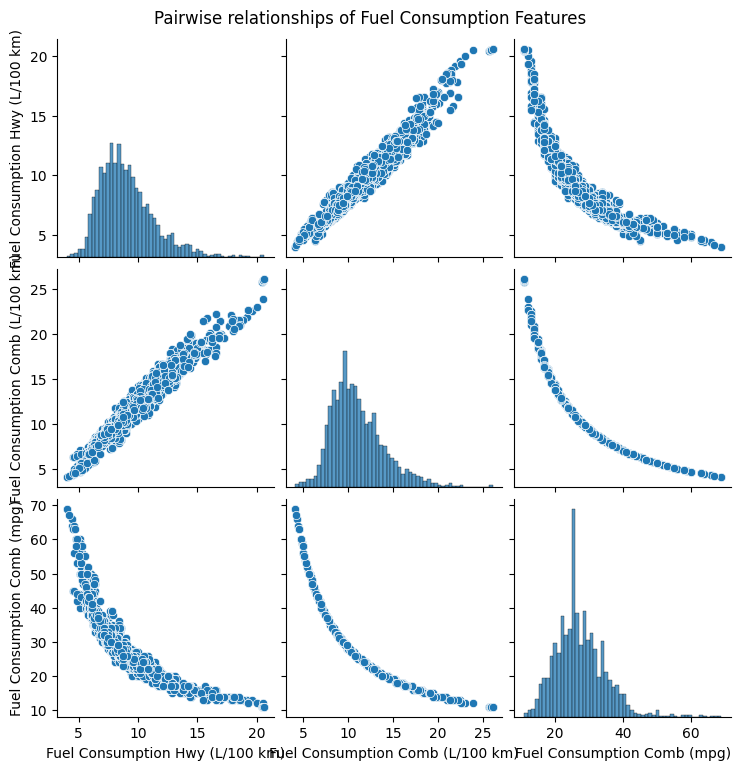

In [ ]:
cols_to_visualize = ['Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']
sns.pairplot(df[cols_to_visualize])
plt.suptitle('Pairwise relationships of Fuel Consumption Features', y=1.02)
plt.show()

1. Fuel Consumption Hwy (L/100 km) vs Fuel Consumption Comb (L/100 km)

Strong positive linear correlation → As highway consumption increases, combined consumption also rises.

Most points cluster around 5–10 L/100 km (highway) and 6–12 L/100 km (combined).

Few outliers above 15+ L/100 km → large SUVs, trucks, or sports cars.

Insight: Vehicles efficient on highways are also efficient overall.

2. Fuel Consumption Comb (L/100 km) vs Fuel Consumption Comb (mpg)

Strong negative correlation (hyperbolic shape) → Higher L/100 km = lower mpg.

Cluster ranges:

Efficient cars: ~5–7 L/100 km ↔ 35–50 mpg.

Moderate cars: ~8–12 L/100 km ↔ 20–30 mpg.

Inefficient cars: 15+ L/100 km ↔ <15 mpg.

Insight: The two are inverse measures of the same thing — mpg is just a different scale.

3. Fuel Consumption Hwy (L/100 km) vs Fuel Consumption Comb (mpg)

Clear negative correlation → lower highway fuel usage = higher mpg.

Cars cluster around:

Highway efficient (5–7 L/100 km) → 35–45 mpg.

Highway inefficient (>12 L/100 km) → <20 mpg.

Insight: Highway efficiency directly boosts overall mpg ratings.

Key Takeaways:-

Metrics are consistent → All three measures are tightly correlated.

No contradictions: if a car is efficient on highways, it’s efficient overall.

Clusters form efficiency tiers:

High efficiency (5–7 L/100 km, 35–50 mpg).

Moderate efficiency (8–12 L/100 km, 20–30 mpg).

Low efficiency (>15 L/100 km, <15 mpg).

Outliers: High-consumption vehicles stand out (muscle cars, large SUVs/trucks).

Conclusion: This visualization confirms that mpg is just the flip side of L/100 km, and highway consumption strongly drives combined efficiency.

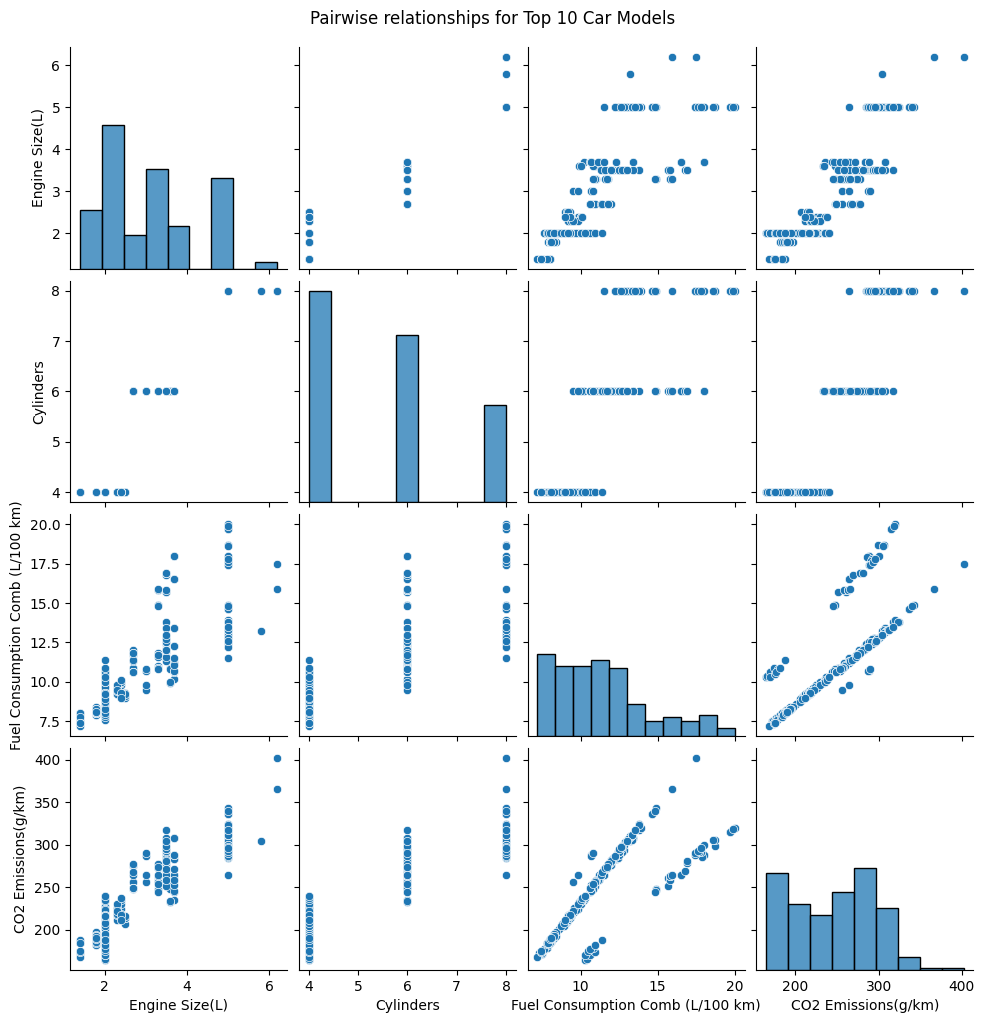

In [ ]:
top_cars_model = df[df['Model'].isin(top_models)]
numerical_cols_top_cars_model = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
sns.pairplot(data=top_cars_model, vars=numerical_cols_top_cars_model)
plt.suptitle('Pairwise relationships for Top 10 Car Models', y=1.02)
plt.show()

1. Engine Size (L) vs Cylinders

Strong positive correlation → Larger engines almost always have more cylinders.

Clusters visible:

2.0–2.5L with 4 cylinders → common in compact/mid-size sedans (Toyota Corolla, Honda Civic, Hyundai Elantra).

3.0–3.5L with 6 cylinders → SUVs and larger sedans (Toyota Camry V6, Ford Escape).

Few 5.0–6.0L with 8 cylinders → performance/luxury (Ford Mustang, Dodge Challenger).

Insight: Engine size and cylinders define vehicle class (economy vs performance).

2. Engine Size (L) vs Fuel Consumption (L/100 km)

Strong upward trend → bigger engines consume more fuel.

Clear separation of clusters:

Small engines (≤2.5L): ~6–10 L/100 km (efficient cars).

Medium engines (3–4L): ~10–14 L/100 km (SUVs, family sedans).

Large engines (5L+): >15 L/100 km (sports/muscle cars).

Insight: Fuel efficiency drops sharply as engine size increases.

3. Cylinders vs Fuel Consumption

Clear step-like increases:

4 cylinders → lowest fuel consumption (efficient).

6 cylinders → moderate consumption.

8+ cylinders → extremely high consumption.

Insight: Cylinder count is a direct proxy for fuel economy.

4. Fuel Consumption vs CO₂ Emissions

Very strong positive linear correlation.

Models with higher L/100 km always produce more CO₂.

Outliers:

Hybrid/electric models → very low fuel consumption + CO₂.

V8 models → extremely high both.

Insight: Reducing fuel consumption = reducing emissions, without exception.

5. Engine Size / Cylinders vs CO₂ Emissions

Larger engines and higher cylinders produce dramatically more CO₂.

Clear “stair-step” pattern:

4-cyl cars cluster at ~150 g/km CO₂.

6-cyl cars ~200–250 g/km.

8+ cyl cars >300 g/km.

Insight: Engine architecture directly drives environmental impact.

**Key Insights (Top Models Only):-**

1.Compact models (Toyota Corolla, Honda Civic, Hyundai Elantra, etc.)

Small 4-cylinder engines.

Very efficient (~6–8 L/100 km, ~150 g/km CO₂).

Dominate sales due to balance of affordability + eco-friendliness.

2.SUV/family sedans (Toyota Camry, Ford Escape, etc.)

Mid-size 6-cylinder engines.

Moderate consumption (~10–14 L/100 km, ~200–250 g/km CO₂).

Middle ground segment.

3.Performance models (Ford Mustang, Dodge Challenger, etc.)

Large 8-cylinder engines.

High consumption (15+ L/100 km, 300–400+ g/km CO₂).

Niche, but major CO₂ contributors.

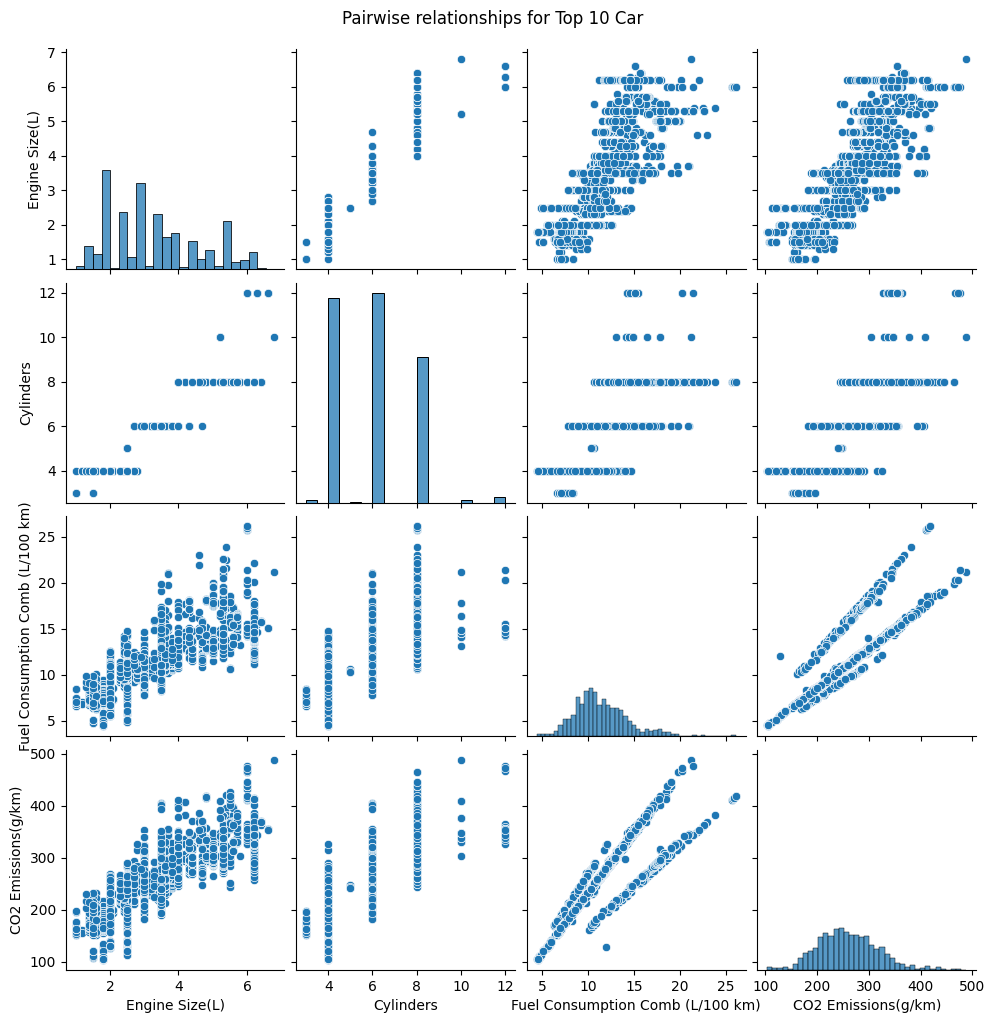

In [ ]:
top_cars_data = df[df['Make'].isin(top_cars)]
numerical_cols_top_cars = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
sns.pairplot(data=top_cars_data, vars=numerical_cols_top_cars)
plt.suptitle('Pairwise relationships for Top 10 Car', y=1.02)
plt.show()

**Insights:-**



1. Engine Size (L) vs Cylinders

Strong positive linear relationship:

Cars with bigger engines almost always have more cylinders.

4-cylinder engines dominate small (≤2.5L) engines.

6–8 cylinders typically fall in 3.0–6.0L range.

Extreme luxury/performance cars show 10–12 cylinders with >5.0L engines.

Brand insight: Toyota, Honda, Hyundai lean heavily on 4-cylinder, small engines, while brands like BMW, Ford, Mercedes also cover 6–8 cylinder larger engines.

2. Engine Size (L) vs Fuel Consumption (L/100 km)

Clear positive trend: larger engines consume more fuel.

Small engines (≤2.0L) → highly fuel-efficient (6–9 L/100 km).

Mid engines (2.0–3.5L) → moderate fuel consumption (10–14 L/100 km).

Large engines (≥5.0L) → extreme consumption (15–25 L/100 km).

Brand insight: Japanese/Korean brands cluster in small engines + low consumption; American/German brands push larger engines + high consumption.

3. Engine Size (L) vs CO₂ Emissions (g/km)

Almost linear upward relationship:

Bigger engines → higher CO₂ emissions.

Small engines (≤2.0L) → ~120–180 g/km.

Large engines (≥5.0L) → ~250–400+ g/km.

Hybrid exceptions (e.g., Toyota Prius) → smaller engines with much lower emissions than expected.

4. Cylinders vs Fuel Consumption

4 cylinders → lowest fuel consumption (6–10 L/100 km).

6 cylinders → ~11–15 L/100 km.

8–12 cylinders → >15 L/100 km.

Clear stepwise increase in fuel usage with cylinder count.

5. Cylinders vs CO₂ Emissions

Again, stepwise relationship:

4 cylinders → ~150 g/km.

6 cylinders → ~200 g/km.

8–12 cylinders → ~300–400 g/km.

Hybrid 4-cylinders sit far below the average line → proving the tech advantage.

6. Fuel Consumption vs CO₂ Emissions

Strong linear correlation (almost diagonal line).

Higher fuel consumption directly translates to higher emissions.

Clusters:

Efficient cluster → ~7 L/100 km, ~150 g/km (Toyota, Honda, Hyundai).

Inefficient cluster → ~15–20 L/100 km, ~300+ g/km (Ford trucks, BMW M-series, Mercedes AMG).

**Key Insights:-**

1.Engine size and cylinder count are primary drivers of both fuel consumption and CO₂ emissions.

2.Fuel consumption and CO₂ emissions are almost perfectly correlated, validating CO₂ as a direct function of fuel burn.

3.Brand strategies differ:

Toyota, Honda, Hyundai → small engines, high efficiency, hybrids.

Ford, BMW, Mercedes → larger engines, higher performance, higher emissions.

4.Hybrid technology breaks the expected linear pattern, showing lower emissions despite engine size.

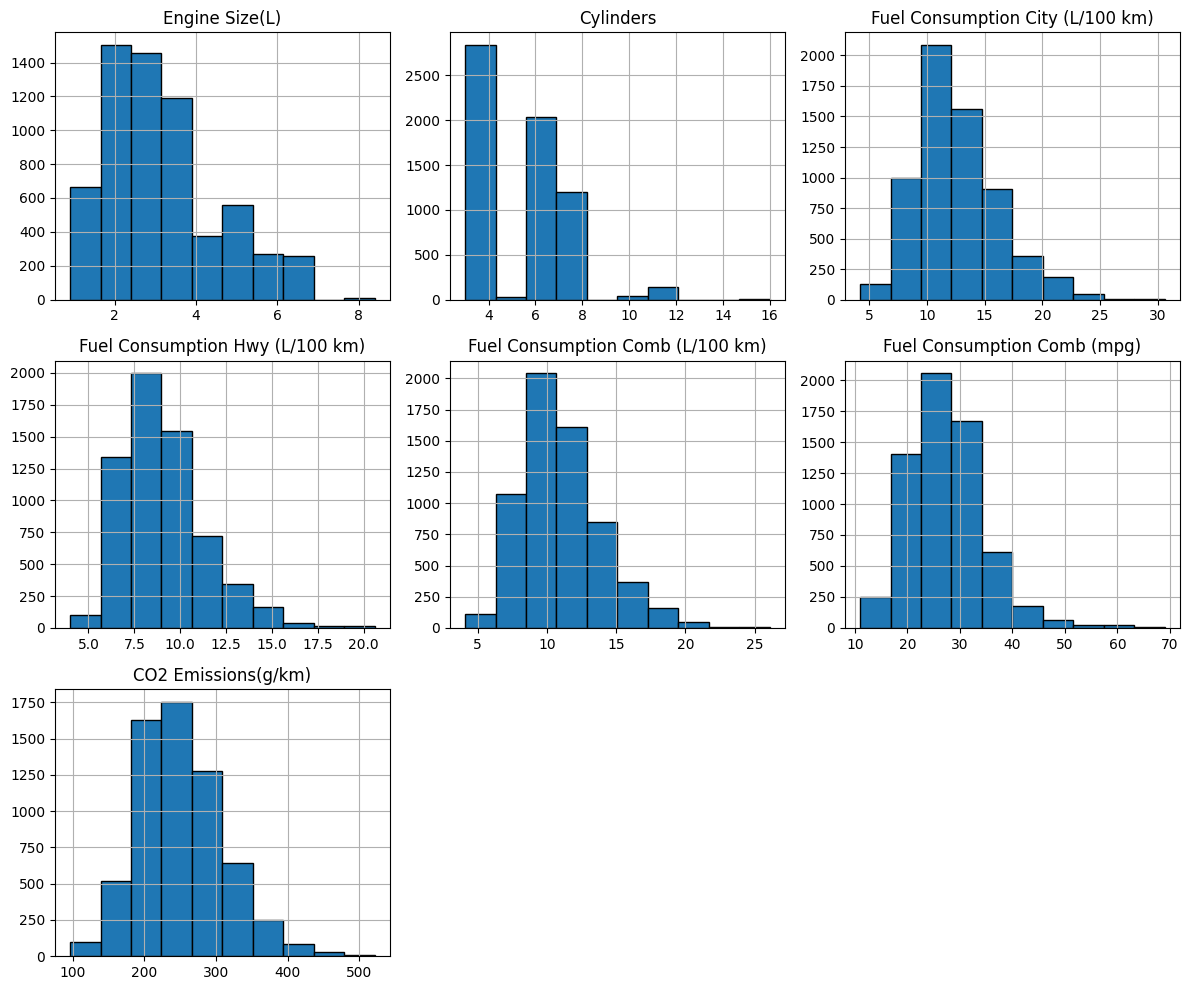

In [ ]:
df.hist(figsize=(12, 10), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()

Histogram Analysis Report: CO₂ Emission Dataset
1. Engine Size (L)

Shape: Right-skewed (positively skewed).

Most engines fall between 1.5L and 3.5L.

Peaks:

A very strong peak around 2.0L (common in compact/mid-size sedans, especially Japanese/Korean brands).

Another smaller peak around 3.5L (SUVs, light trucks).

Few extreme values at >5.0L (luxury sports cars & big trucks).

Insight: The dataset is dominated by smaller to mid-size engines, but still includes performance/luxury extremes.

2. Cylinders

Discrete distribution (not continuous).

Strong peaks at 4 cylinders and 6 cylinders → most common.

8 cylinders also significant, while 3, 5, 10, and 12 cylinders are rare.

Insight: The automotive market heavily relies on 4-cylinders (economy cars) and 6-cylinders (SUVs, performance cars).
Luxury/performance 8+ cylinders are outliers.

3. Fuel Consumption (City & Hwy & Comb) [L/100 km]

Combined Consumption (Comb) is bell-shaped but slightly right-skewed.

Bulk of vehicles consume between 7 and 13 L/100 km.

A small tail extends to >20 L/100 km (gas guzzlers like V8 trucks).

City Consumption is generally higher than Highway, as expected.

Highway Consumption clusters tightly at the lower end (efficient driving).

Insight: Most vehicles are reasonably efficient, but a small group consumes double the average fuel.

4. Fuel Consumption (mpg) (inverse of L/100km)

Right-skewed distribution, with most vehicles at 15–30 mpg.

A smaller group achieves 40–60 mpg (hybrids, compact cars).

Very few vehicles fall below 10 mpg (sports/luxury SUVs).

Insight: Efficiency is clustered around the average, but hybrids and small cars stand out on the high end.

5. CO₂ Emissions (g/km)

Strong bell-like distribution, slightly right-skewed.

Bulk of vehicles emit between 150–250 g/km.

A long tail goes up to 400+ g/km (large-engine trucks & sports cars).

A few outliers below 100 g/km (hybrid/electric vehicles).

Insight: Majority of cars emit moderate CO₂, but a small number of high-performance vehicles massively pollute, dragging up the average.

 Key Insights from Histograms :-

Most vehicles have small to mid-size engines (2–3.5L) and 4–6 cylinders.

Fuel consumption clusters around 7–13 L/100 km (20–30 mpg), but outliers exist at both ends.

CO₂ emissions are concentrated around 150–250 g/km, but high-pollution outliers (>400 g/km) exist.

Market split:

Mass-market cars → efficient, low CO₂, small engines (Toyota, Honda, Hyundai).

Premium/performance cars → large engines, high consumption, high CO₂ (BMW, Mercedes, Ford trucks).

Hybrids/electrics → small cluster of extremely low-emission outliers.

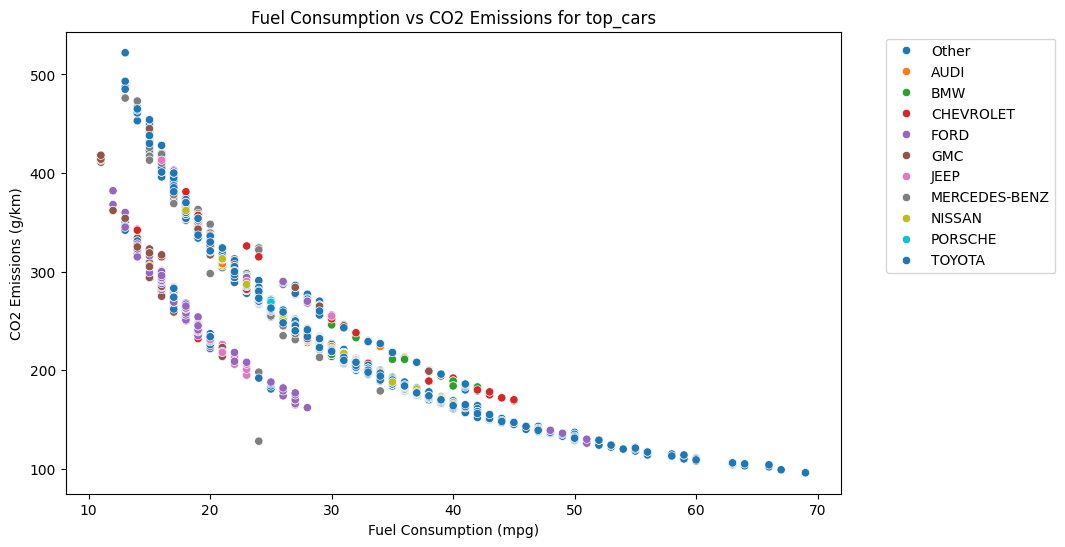

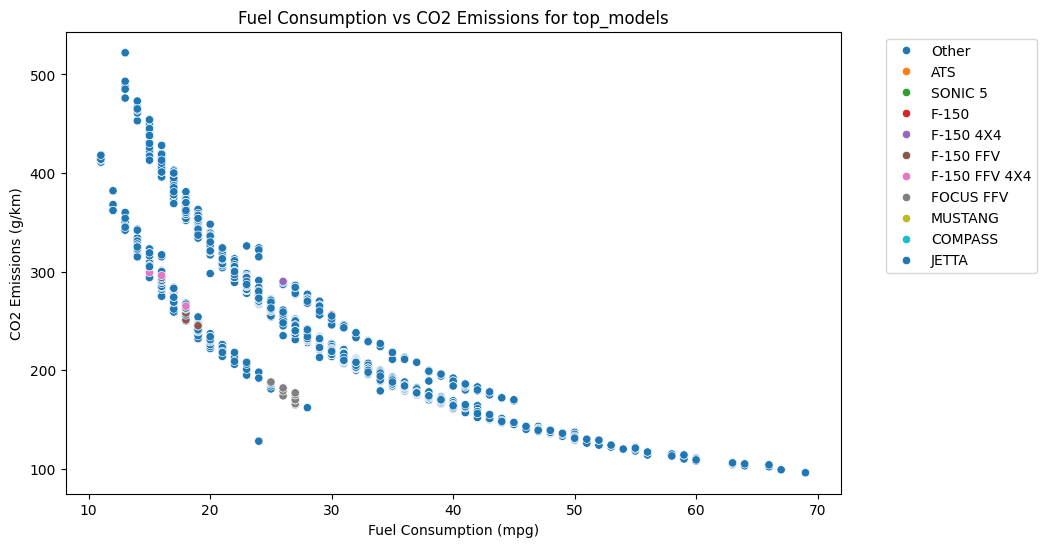

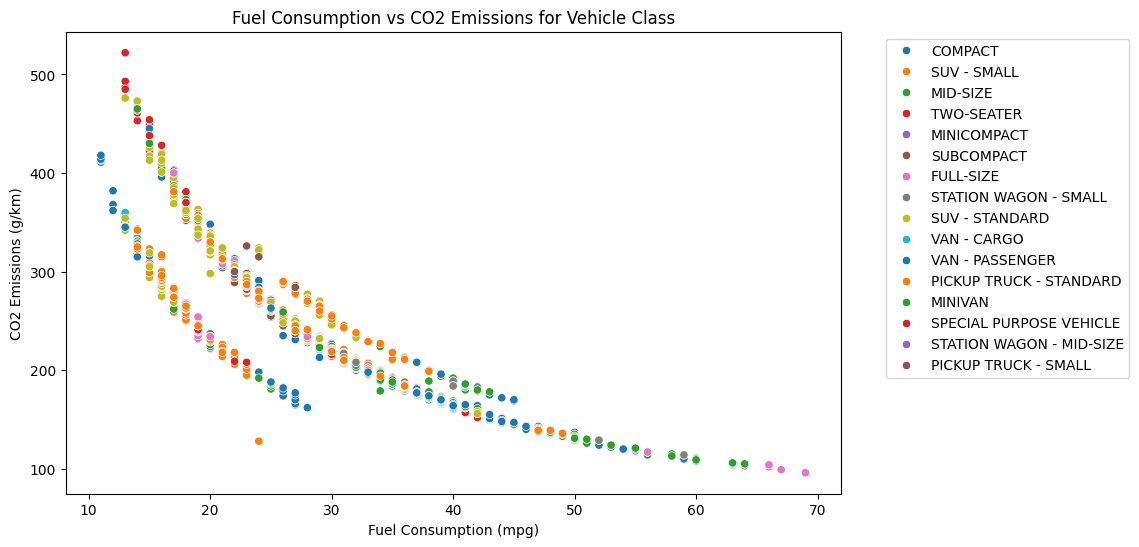

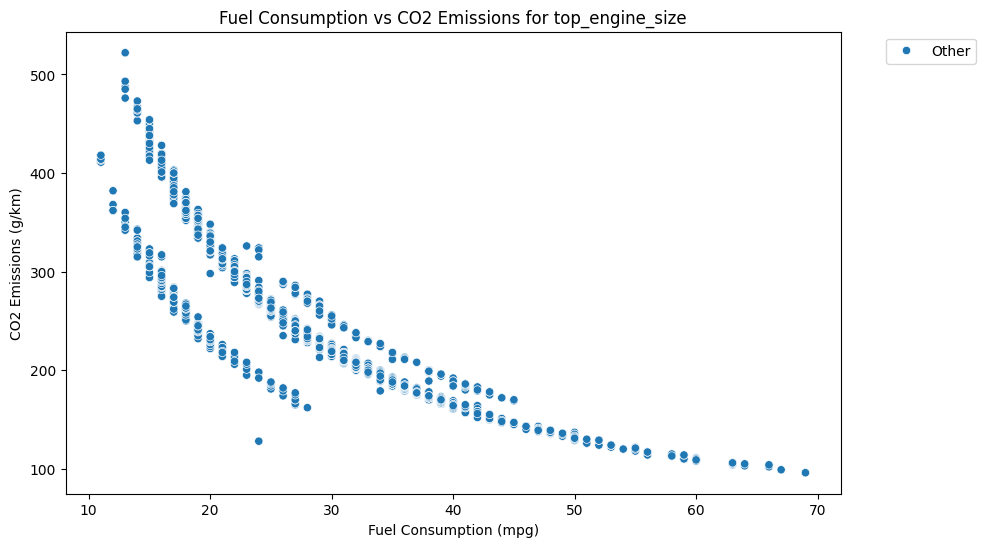

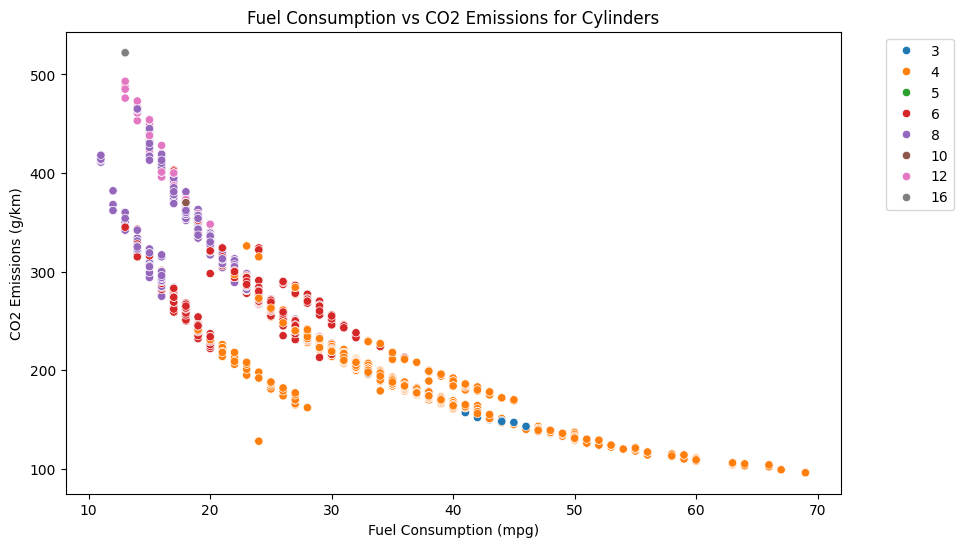

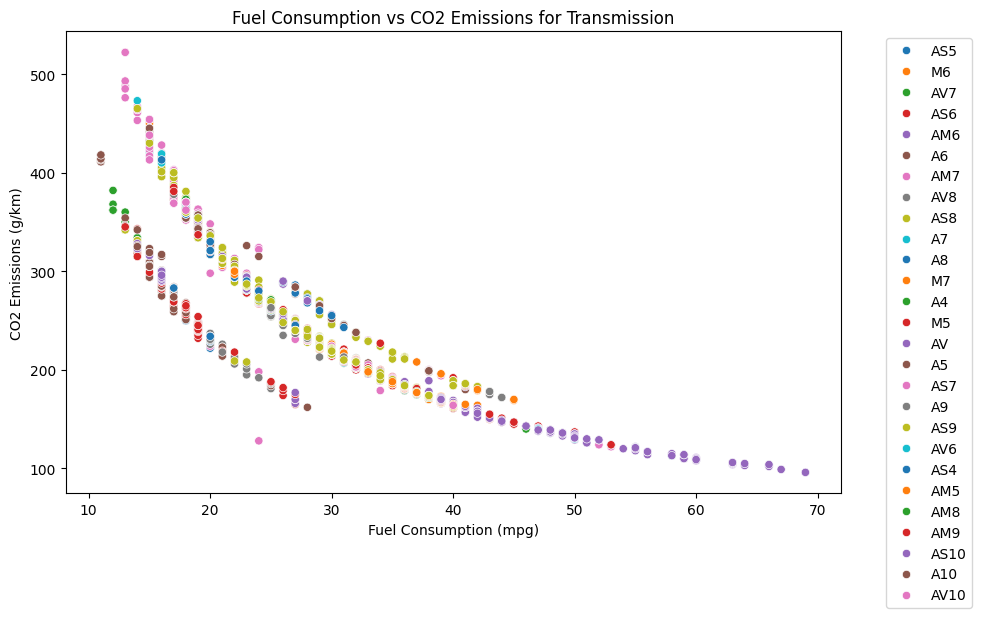

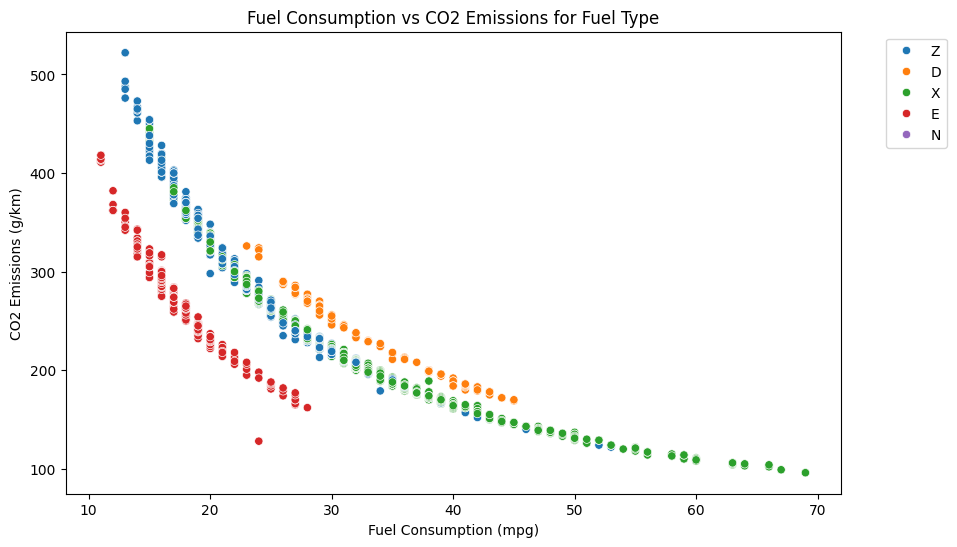

In [ ]:
df['top_cars'] = df['Make'].where(df['Make'].isin(top_cars), other="Other")
df['top_models'] = df['Model'].where(df['Model'].isin(top_models), other="Other")
df['top_engine_size'] = df['Engine Size(L)'].where(df['Engine Size(L)'].isin(top_models), other="Other")
df['top_Transmission'] = df['Transmission'].where(df['Transmission'].isin(top_models), other="Other")
hue_col = ["top_cars", "top_models", "Vehicle Class",
           "top_engine_size", "Cylinders",
           "Transmission", "Fuel Type"]
for i in hue_col:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)' , hue = i , palette = 'tab10')
    plt.title(f'Fuel Consumption vs CO2 Emissions for {i}')
    plt.xlabel('Fuel Consumption (mpg)')
    plt.ylabel('CO2 Emissions (g/km)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

**Insights:-**

1. Top Car Manufacturers (top_cars)

Major brands (Toyota, Honda, Hyundai, etc.) cluster in the low CO₂, high mpg range → reflecting their focus on fuel efficiency and hybrid/electric models.

Luxury & performance brands (BMW, Mercedes, Porsche, etc.) sit at higher CO₂, lower mpg → large engines and premium SUVs.

Other brands show scattered performance with no consistent trend.

Insight: Manufacturer strategies strongly influence emissions. Japanese & Korean brands dominate efficiency, while German & US brands lean toward performance but higher emissions.

2. Top Models (top_models)

Efficient models (like Prius, Civic, Corolla, Elantra) → high mpg, low CO₂ cluster.

Performance models (Mustang, Camaro, Challenger) → low mpg, high CO₂.

SUVs & trucks models show widely spread emissions, highlighting model-to-model variation even within the same manufacturer.

Insight: Model-level differences are sharper than brand-level — even efficient brands produce inefficient models in some segments.

3. Vehicle Class

Two-seaters, subcompacts, compact cars → clear concentration at low emissions & high fuel efficiency.

SUVs, pickup trucks, vans → highest CO₂ emissions, lowest mpg.

Mid-size cars → middle ground, overlapping both efficient and inefficient ranges.

Insight: Vehicle class is one of the strongest determinants of efficiency, regardless of brand.

4. Engine Size (top_engine_size)

Small engines (≤2.0L) → low CO₂ emissions, high mpg (efficient zone).

Large engines (≥5.0L) → highest CO₂, lowest mpg (worst performers).

Mid-sized engines (2.0L–3.5L) → spread across the middle range depending on transmission/fuel type.

Insight: Engine size has a direct positive correlation with CO₂ emissions and a negative correlation with mpg.

5. Cylinders

4-cylinder engines dominate the efficient zone.

6-cylinder engines → higher CO₂, lower mpg, but still moderate compared to V8.

8, 10, 12, 16 cylinders → extreme CO₂ emissions, especially in SUVs & sports cars.

3-cylinder & hybrid engines → very efficient cluster.

Insight: More cylinders = higher emissions, but efficiency depends on pairing with hybrid/modern transmission tech.

6. Transmission

Modern multi-speed transmissions (AM8, AS9, CVTs) → cluster in low CO₂, higher mpg zone.

Older or manual transmissions (M5, M6, AM6) → tend toward higher CO₂ emissions.

Automated & dual-clutch systems provide better optimization.

Insight: Transmission technology plays a secondary but significant role in improving efficiency.

7. Fuel Type

Hybrid/Electric → lowest CO₂ emissions (near-zero for EVs).

Diesel → better mpg and lower CO₂ compared to gasoline (at same power output).

Gasoline → mid-range, dominating the dataset.

Ethanol (E85) → surprisingly high CO₂ emissions, despite renewable source.

Insight: Fuel type dramatically shifts emissions. Hybrids & EVs are the future trend, while gasoline SUVs/trucks remain the worst emitters.

**Key Takeaways:-**

Vehicle Class, Engine Size, and Cylinders are the biggest determinants of CO₂ emissions.

Transmission & Fuel Type offer meaningful improvements within the same class/engine category.

Brands & Models show strategic differences: some focus on efficiency (Toyota Prius, Honda Civic), others on performance (Ford Mustang, Dodge Challenger).

Policy & consumer shifts toward hybrid and EV adoption could drastically lower emissions in the future.

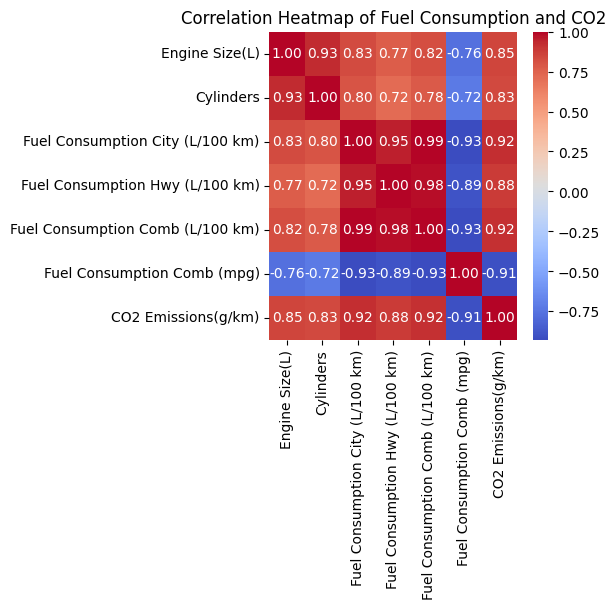

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(df[["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)","Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Fuel Consumption and CO2')
plt.show()